# CISCO Post Scraper

#### LOADING DEPENDENCIES

In [1]:
import requests
import bs4

##### class post_info


Creating post_info class which bundles all relevant info to a post


In [28]:
class post_info:
    def __init__(self,post,date,views,upvotes,replies):
        self.post = post
        self.date = date
        self.upvotes = int(upvotes)
        self.replies = int(replies)
        self.views = int(views)
        
    def disp_info(self):
        print("\n\nPost : " +self.post+"\nDate : "+self.date+ "\nReplies : "+str(self.replies) +"\t\t views : "+str(self.views)+"\t\t upvotes :"+str(self.upvotes ))


#### SCRAPING HELPER FUNCTIONS

##### load_page(url)

Thisfunction loads all the post in the page of given "url" and returns a list of post_info class object

parameter(s) :
    url : page link

In [29]:
def load_page(url):
    res = requests.get(url)
    soup = bs4.BeautifulSoup(res.text,'lxml')
    
    posts = []
    
    raw_replies = (soup.select("div.lia-quilt-column-alley-left tr.lia-list-row div.lia-component-messages-column-thread-replies-count span"))
    n_rep = len(raw_replies)
    
    replies = []
    for reply in raw_replies:
        replies.append(reply.getText())
        
        
    raw_views = soup.select("div.lia-quilt-column-alley-left tr.lia-list-row div.lia-component-messages-column-topic-views-count span")
    n_views = len(raw_views)
    
    views = []
    for view in raw_views:
        views.append(view.getText())
        
        
    raw_dates = (soup.select("div.lia-quilt-column-alley-left tr.lia-list-row div.lia-info-area > span:nth-of-type(1) span.local-date"))
    n_dates = len(raw_dates)
    
    dates = []
    for date in raw_dates:
        dates.append(date.getText()[1:])
        
    
    raw_titles = (soup.select("div.lia-quilt-column-alley-left tr.lia-list-row div.MessageSubject a.lia-custom-event.lia-link-navigation.page-link"))
    n_titles = len(raw_titles)
    
    titles = []
    for title in raw_titles:
        _t = title.getText().split()
        titles.append(" ".join(_t))
    
    
    raw_upvotes = soup.select("div.lia-quilt-column-alley-left tr.lia-list-row div.custom-grid-kudos span")
    n_upvotes = len(raw_upvotes)
    
    upvotes = []
    for upvote in raw_upvotes:
        upvotes.append(upvote.getText()[4:-3])
    
        
    if n_rep == n_upvotes == n_titles == n_dates == n_views:
        
        print("number of posts : "+str(n_rep))
        
        for i in range(n_titles):
            posts.append(post_info(titles[i],dates[i],views[i],upvotes[i],replies[i]))
        
        return posts
    
    else:
        
        print("error encountered : unequal data contraints")
        
        print("number of replies : "+str(n_rep))
        print("number of views " + str(n_views))
        print("number of upvotes " +str(n_upvotes))
        print("number of dates " +str(n_dates))
        print("number of titles "+str(n_titles))
        
        return None

##### load_topic(base_url, num_pages, start_page = 50,sep_pages = False, display = False)


This function loads pages from a particular topics base url


parameters : 


    base_url : base url of given topic
    
    num_pages : number of pages to be loaded
    
    start_page : starting page number for scraping
    
    sep_pages : if True returns list of list of page posts
    
    display : Set true to display results after completion

In [30]:
def load_topic(base_url, num_pages, start_page = 50,sep_pages = False, display = False):
    
    all_posts = []
    sep_posts = []
    
    for i in range(num_pages):
        
        load_url = base_url + str(start_page+i)
        page_posts = load_page(load_url)
        
        sep_posts.append(page_posts)
        all_posts.extend(page_posts)
        
        if page_posts != None:
            print("page number : "+str(start_page+i) + " loaded successfully")
        else:
            print("page number : "+str(start_page+i) + " load error")
            return all_posts
        
    if display:
        for i in range(len(all_posts)):
            all_posts[i].disp_info()
            
    if sep_pages :
        return sep_posts
    else:
        return all_posts
        

In [63]:
base_url = 'https://supportforums.cisco.com/t5/lan-switching-and-routing/bd-p/6016-discussions-lan-switching-routing/page/'
posts = load_topic(base_url, num_pages = 30, start_page = 50,sep_pages = False, display = False )

number of posts : 15
page number : 50 loaded successfully
number of posts : 15
page number : 51 loaded successfully
number of posts : 15
page number : 52 loaded successfully
number of posts : 15
page number : 53 loaded successfully
number of posts : 15
page number : 54 loaded successfully
number of posts : 15
page number : 55 loaded successfully
number of posts : 15
page number : 56 loaded successfully
number of posts : 15
page number : 57 loaded successfully
number of posts : 15
page number : 58 loaded successfully
number of posts : 15
page number : 59 loaded successfully
number of posts : 15
page number : 60 loaded successfully
number of posts : 15
page number : 61 loaded successfully
number of posts : 15
page number : 62 loaded successfully
number of posts : 15
page number : 63 loaded successfully
number of posts : 15
page number : 64 loaded successfully
number of posts : 15
page number : 65 loaded successfully
number of posts : 15
page number : 66 loaded successfully
number of post

In [64]:
print(len(posts))

450


In [31]:
import string
def save_csv(posts,filename):
    
    csv = open(filename, "w",encoding='utf-8')
    columnTitleRow = "Post,Date,Views,Replies,Upvotes\n"
    csv.write(columnTitleRow)
    table = str.maketrans({key: None for key in string.punctuation})
    
    for post in posts:
        post_string = post.post.translate(table) 
        row = post_string + "," + post.date + "," + str(post.views) + "," + str(post.replies) + "," + str(post.upvotes) + "\n"
        csv.write(row)
        

In [66]:
save_csv(posts,"posts.csv")

In [3]:
import pandas as pd
data = pd.read_csv("posts.csv",parse_dates=['Date'])

print(len(data))
data.head()

4800


,Post,Date,Views,Replies,Upvotes
0,2960x port updown when Vivi box in us,2018-05-16,157,2,0
1,best way to configuration switch port,2018-05-17,202,6,5
2,Nexus 3548Block vlan communication whe,2018-05-17,71,2,0
3,ACL confusion,2018-05-17,158,4,0
4,Boot 3750 from tftp,2011-08-04,9238,21,14


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
filtered_data = data[(data['Date'] > '2017-10-01')]

In [12]:
date_hits = (filtered_data['Date'].value_counts().sort_index())

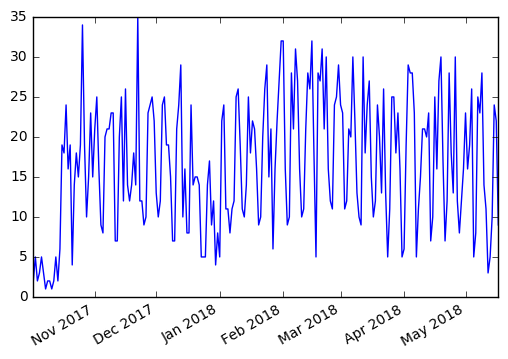

In [24]:
date_hits.plot.line()

In [ ]:
base_url = 'https://supportforums.cisco.com/t5/lan-switching-and-routing/bd-p/6016-discussions-lan-switching-routing/page/'
posts = load_topic(base_url, num_pages = 50, start_page = 370,sep_pages = False, display = False )

In [12]:
save_csv(posts,"posts2.csv")

In [1]:
posts[1]

NameError: name 'posts' is not defined

In [120]:
posts[74].disp_info()



Post : Nexus 5672UP reload module without relo...
Date : 04-18-2018
Replies : 2		 views : 84		 upvotes :0


In [ ]:
len(posts)

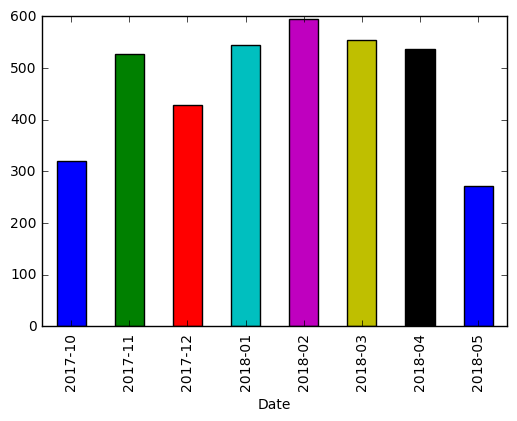

In [17]:
monthly_hits = filtered_data['Date'].groupby(filtered_data.Date.dt.to_period("M")).agg('count')
monthly_hits.plot.bar()

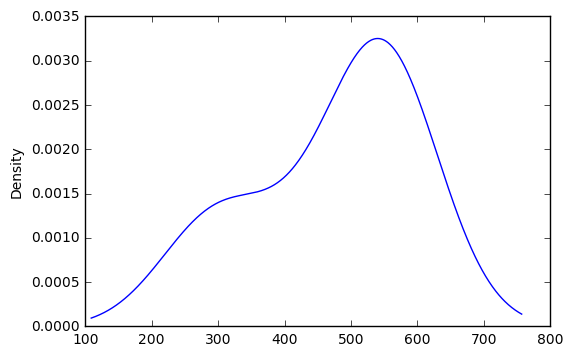

In [18]:
monthly_hits.plot.density()